#  pySUMMA Example 1 (Testcase Figure 7, SUMMA 2nd Paper(2015))

### pySUMMA is object oriented python wrapper for SUMMA Model (Structure for Unifying Multiple Modeling Alternatives)

* This jupyter notebook demonstrates how to maniputate SUMMA setting file, run summa model, and display output using pysumma package.

 1. (Simulation.py) How to manipulate FileManager text file that controls setting, input, and output Directory and filename.

 2. (Decisions.py) How to manipulate Decision text file that controls the simulation start and finish time and 27 analysis methods.  

 3. (Simulation.py) How to run summa model

 4. (Plotting.py) How to display summa output (file format : netCDF)

#### The procedure of this pysumma example 1

 1. The location of research area
 2. Explanation of FileManager file and decription of the property of watershed
 3. Explanation of Decision file and How to manipulate Decision file 
 4. Apply three different stomatal resistance method and run summa model
 5. Express graph with the result of summa 

## (1) The location of research area

#### Location : The Raynolds Mountain East catchment in southwestern Idaho

* Describe Location with map

In [1]:
from pysumma.spatial import spatial
import matplotlib.pyplot as plt
import geopandas as gp
from jupyterthemes import jtplot
jtplot.figsize(x=10, y=10)

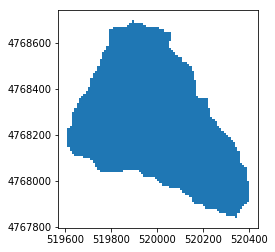

In [2]:
gdf = gp.GeoDataFrame.from_file('/home/hydro/Downloads/shape/ReynoldsMountainEast.shp')
gdf.plot()

## (2) manipulating FileManager file and understanding Setting and Input file

#### The FileManager file controls setting, input and output directory and text, netcdf file at each directory. 
1. Version of the file manager : 'SUMMA_FILE_MANAGER_V1.0'
2. SETNGS_PATH: Base path for the configuration files. Most of the file paths in the remainder of the master 
   configuration file are relative to this path
3. INPUT_PATH: Base path for the meteorological forcing files specified in the FORCING_FILELIST
4. OUTPUT_PATH: Base path for the SUMMA output files
5. M_DECISIONS: File path for the model decisions file (relative to SETNGS_PATH)
6. Metadata file : Time, LocalAttribute, Category ...
7. LocalAttributes, LocalParamInfo, BasinParamInfo ....

### (2-1) import Simulation Module

In [3]:
from pysumma.Simulation import Simulation
from pysumma.Plotting import Plotting

### (2-2) read and understand FileManager text file

<span style="color:blue"> __- Create S1 attribute to figure out FileManger file __

In [4]:
S1 = Simulation('/home/hydro/Downloads/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenBallBerry.txt')

<span style="color:blue"> __- How to read filepath, filename, value and name of Decision file in FileManager file__

In [5]:
S1.decision_path.filepath, S1.decision_path.filename, S1.decision_path.value, S1.decision_path.name

('wrrPaperTestCases/figure07/',
 'summa_zDecisions_riparianAspenBallBerry.txt',
 'wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenBallBerry.txt',
 'decision')

#### The summary of example watershed : The Raynolds Mountain East catchment in southwestern Idaho


<span style="color:blue"> __- A-1. read forcing data "forcing_above_aspen.nc" in InputData folder__

In [6]:
Input_forcing = S1.input_path.value + 'forcing_above_aspen.nc'

In [7]:
Forcing_aspen = Plotting(Input_forcing)

In [8]:
Input_forcing_aspen = Forcing_aspen.open_netcdf()

<span style="color:blue"> __- A-2. latitude and longitude of research area__

In [9]:
Input_forcing_aspen.latitude, Input_forcing_aspen.longitude

(<xarray.DataArray 'latitude' (hru: 1)>
 array([43.2])
 Dimensions without coordinates: hru, <xarray.DataArray 'longitude' (hru: 1)>
 array([243.2])
 Dimensions without coordinates: hru)

<span style="color:blue"> __- A-3. Time period of input Observation data__

In [10]:
Input_forcing_aspen.time

<xarray.DataArray 'time' (time: 87672)>
array(['1998-10-01T00:59:59.999996640', '1998-10-01T02:00:00.000003360',
       '1998-10-01T03:00:00.000000000', ..., '2008-09-30T21:59:59.999996672',
       '2008-09-30T23:00:00.000003328', '2008-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-10-01T00:59:59.999996640 ...
Attributes:
    long_name:  Observation time

<span style="color:blue"> __- A-4. The number of hru and hruId__

In [11]:
Input_forcing_aspen.hruId

<xarray.DataArray 'hruId' (hru: 1)>
array([1001], dtype=int32)
Dimensions without coordinates: hru

<span style="color:blue"> __- A-5. The Data timestep of Observation : 3600 seconds (1 hour)__

In [12]:
Input_forcing_aspen.data_step

<xarray.DataArray 'data_step' ()>
array(3600000000000, dtype='timedelta64[ns]')
Attributes:
    long_name:  data step length in seconds

In [13]:
from jupyterthemes import jtplot
jtplot.figsize(x=10, y=10)

<span style="color:blue"> __- A-6. Precipitation rate data (kg/m2/s)__

/home/hydro/miniconda3/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


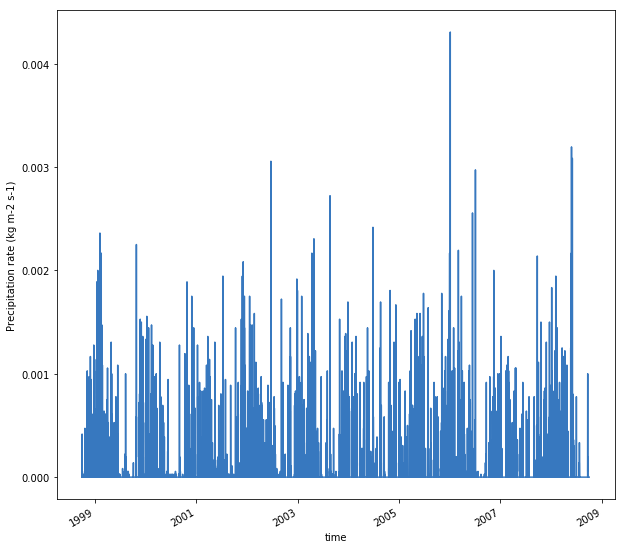

In [14]:
Forcing_aspen.plot_1d(8)

<span style="color:blue"> __- A-7. (LWRadAtm) Downward longwave radiation at the upper boundary (W m-2)__

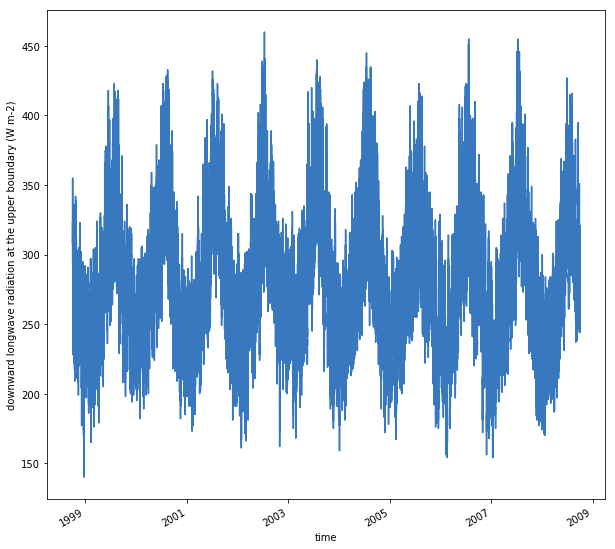

In [15]:
Forcing_aspen.plot_1d(4)

<span style="color:blue"> __- A-8. (SWRadAtm) Downward shortwave radiation at the upper boundary (W m-2)__

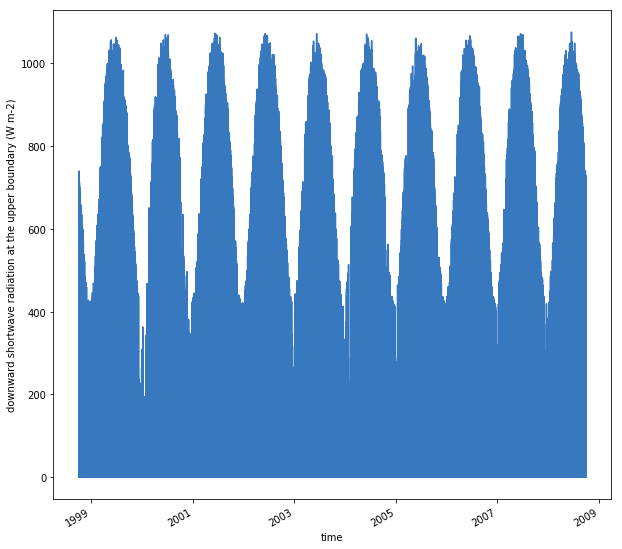

In [16]:
Forcing_aspen.plot_1d(5)

<span style="color:blue"> __- A-9. (airpres) Air pressure at the the measurement height (Pa)__

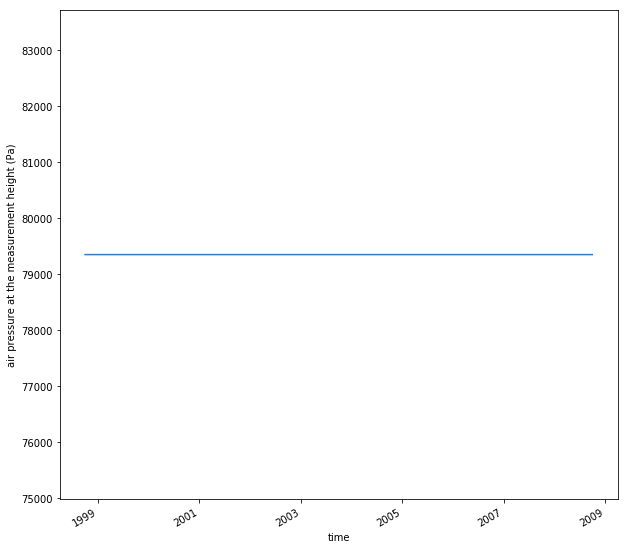

In [17]:
Forcing_aspen.plot_1d(6)

<span style="color:blue"> __- A-10. (airtemp) Air temperature at the measurement height (K)__

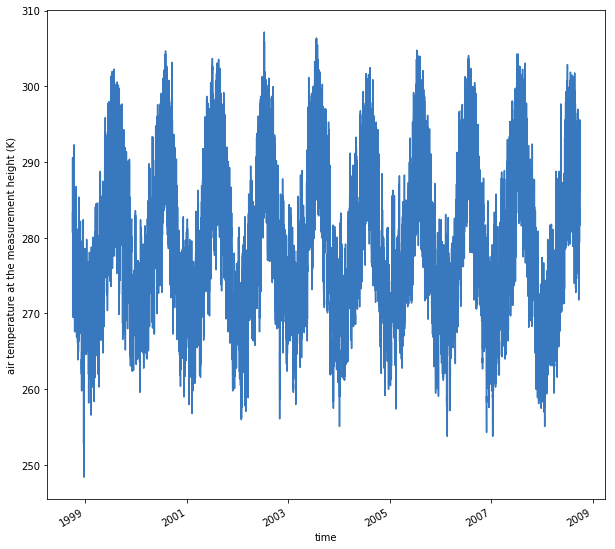

In [18]:
Forcing_aspen.plot_1d(7)

<span style="color:blue"> __- A-11. (pptrate) Precipitation rate (kg m-2 s-1)__

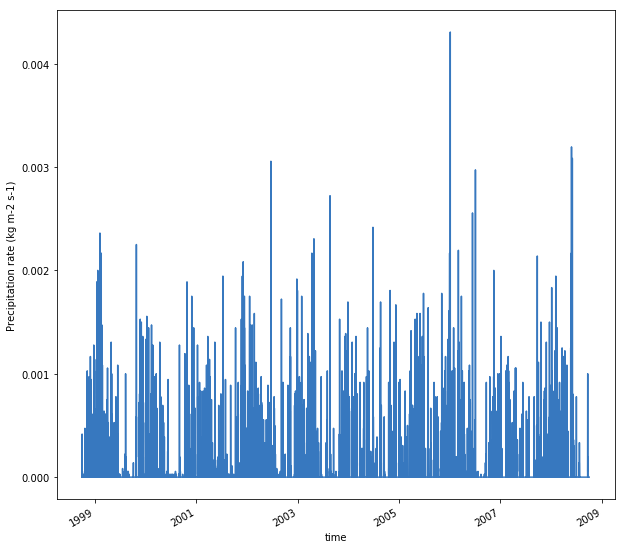

In [19]:
Forcing_aspen.plot_1d(8)

<span style="color:blue"> __- A-12. (spechum) Specific humidity at the measurement height (g g-1)__

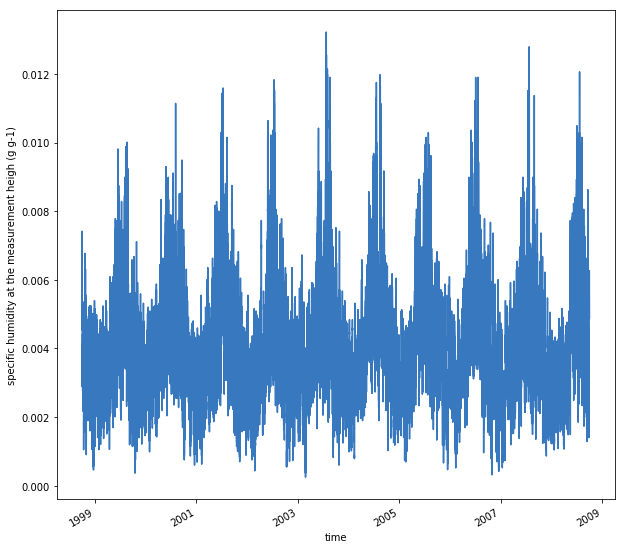

In [20]:
Forcing_aspen.plot_1d(9)

<span style="color:blue"> __- A-13. (windspd) Wind speed at the measurement height (m s-1)__

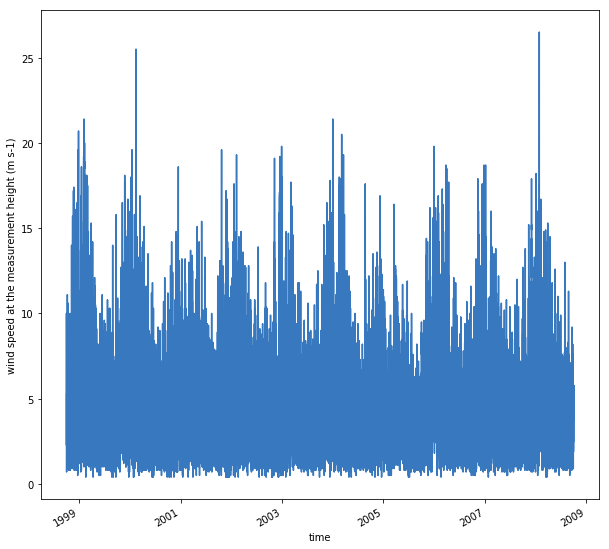

In [21]:
Forcing_aspen.plot_1d(10)

<span style="color:blue"> __- A-14. variable information of forcing_above_aspen.nc in Input Data folder__

In [22]:
Input_forcing_aspen

<xarray.Dataset>
Dimensions:    (hru: 1, time: 87672)
Coordinates:
  * time       (time) datetime64[ns] 1998-10-01T00:59:59.999996640 ...
Dimensions without coordinates: hru
Data variables:
    hruId      (hru) int32 1001
    latitude   (hru) float64 43.2
    longitude  (hru) float64 243.2
    data_step  timedelta64[ns] 01:00:00
    LWRadAtm   (time, hru) float64 ...
    SWRadAtm   (time, hru) float64 ...
    airpres    (time, hru) float64 ...
    airtemp    (time, hru) float64 ...
    pptrate    (time, hru) float64 ...
    spechum    (time, hru) float64 ...
    windspd    (time, hru) float64 ...
Attributes:
    dataset_orig_path:  /d2/anewman/summa/summaTestCases/testCases_data/input...
    history:            Tue Sep 27 21:53:08 2016: ncrename -d nHRU,hru ./inpu...
    NCO:                "4.6.0"

<span style="color:blue"> __- B-1. read Attribute data "summa_zLocalAttributes_riparianAspen.nc" in Setting folder__

In [23]:
Setting_file_LocalAttri = Plotting(S1.setting_path.filepath + S1.local_attr.value)

In [24]:
Setting_file_LocalAttribute = Setting_file_LocalAttri.open_netcdf()

<span style="color:blue"> __- B-2. Area of Hru__

In [25]:
Setting_file_LocalAttribute.HRUarea

<xarray.DataArray 'HRUarea' (hru: 1)>
array([32700.])
Dimensions without coordinates: hru
Attributes:
    long_name:  Area of each HRU
    units:      m^2

<span style="color:blue"> __- B-3. Measurement height above bare ground__

In [26]:
Setting_file_LocalAttribute.mHeight

<xarray.DataArray 'mHeight' (hru: 1)>
array([19.25])
Dimensions without coordinates: hru
Attributes:
    long_name:  Measurement height above bare ground
    units:      m

<span style="color:blue"> __- B-4. Soil Type Index to define Soil Type __
 - Three type of Soil Type : STAS, STAS-RUC, ROSETTA [(03) soil-category dateset in Decision file]
 - This example : (Method) ROSETTA, (Parameter) refer to SOILPARM.TBL with index 8(SANDY LOAM) in setting folder

In [27]:
Setting_file_LocalAttribute.soilTypeIndex

<xarray.DataArray 'soilTypeIndex' (hru: 1)>
array([8], dtype=int32)
Dimensions without coordinates: hru
Attributes:
    long_name:  Index defining soil type
    units:      -

<span style="color:blue"> __- B-5. Vegetation TYpe Index to define Vegetation Type__

<span style="color:blue"> 1. Two type of Vegetation Type : USGS, MODIFIED_IGBP_MODIS_NOAH [(04) vegetation category dataset]
    
<span style="color:blue"> 2. This example : (Method) USGS, (Parameter) refer to VEGPARM.TBL with index 11(Deciduous Broadleaf Forest) in setting folder

In [28]:
Setting_file_LocalAttribute.vegTypeIndex

<xarray.DataArray 'vegTypeIndex' (hru: 1)>
array([11], dtype=int32)
Dimensions without coordinates: hru
Attributes:
    long_name:  Index defining vegetation type
    units:      -

<span style="color:blue"> __- B-6. Variable information of "summa_zLocalAttributes_riparianAspen.nc" in Setting folder__

In [29]:
Setting_file_LocalAttribute

<xarray.Dataset>
Dimensions:         (gru: 1, hru: 1)
Dimensions without coordinates: gru, hru
Data variables:
    hru2gruId       (hru) int32 ...
    downHRUindex    (hru) int32 ...
    slopeTypeIndex  (hru) int32 ...
    soilTypeIndex   (hru) int32 8
    vegTypeIndex    (hru) int32 11
    mHeight         (hru) float64 19.25
    contourLength   (hru) float64 ...
    tan_slope       (hru) float64 ...
    elevation       (hru) float64 ...
    longitude       (hru) float64 ...
    latitude        (hru) float64 ...
    HRUarea         (hru) float64 3.27e+04
    hruId           (hru) int32 ...
    gruId           (gru) int32 ...
Attributes:
    datasource:  *zLocalAttributes*
    history:     Tue Sep 27 21:51:50 2016: ncrename -d nhru,hru -d ngru,gru ....
    NCO:         "4.6.0"

## (2) manipulating Decision text file.

The model decisions file is an ASCII file that indicates the model decisions with which SUMMA is configured.
Model decisions can be specified in any order with one decision per line. The decisions take the form  <keyword> <value>, where <keyword> is the decision to be made and <value> is the option that is selected for that decision.

#### Apply different model representations of stomatal ressitance in (06) choice of function for stomatal resistance
 1. Ball-Berry method
 2. Jarvis method
 3. simple soil resistance method

### (2-1) undertand how to manipulate Decision file and assign for Ball-Berry method

<span style="color:blue"> __- A-1 read Decision text file and create D1 attribute for Ball-Berry method__

In [30]:
D1 = S1.decision_obj

<span style="color:blue"> __- A-2 get default value of simulation start date and time__

In [31]:
D1.simulStart.value

'2006-07-01 00:00'

<span style="color:blue"> __- A-3 set value of simulation start date and time in Decision text file__

In [32]:
D1.simulStart.value = "2007-07-01 00:00"

<span style="color:blue"> __- A-4 set value of simulation finish date and time in Decision text file__

In [33]:
D1.simulFinsh.value = "2007-08-20 00:00"

<span style="color:blue"> __- A-5 get method name, default value, available options and description  for (03) soil category dataset__

In [34]:
D1.soilCatTbl.name, D1.soilCatTbl.value, D1.soilCatTbl.options, D1.soilCatTbl.description

('soilCatTbl',
 'ROSETTA',
 ['STAS', 'STAS-RUC', 'ROSETTA'],
 'soil-category dateset')

In [35]:
import ipywidgets as widgets
from IPython.display import display

<span style="color:blue"> __- A-6 assign Ball Berry method in FileManager file__

In [36]:
storm_resist_BallBerry = D1.stomResist
w1 = widgets.Dropdown(
    options = storm_resist_BallBerry.options,
    description = storm_resist_BallBerry.name,
    disabled = False)
display(w1)

Dropdown(description='stomResist', options=('BallBerry', 'Jarvis', 'simpleResistance'), value='BallBerry')

In [37]:
D1.stomResist.value = w1.value

### (2-2) undertand how to manipulate Decision file and assign for Jarvis method

<span style="color:blue"> __- B-1 Create S2 attribute to figure out FileManger file __

In [38]:
S2 = Simulation('/home/hydro/Downloads/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenJarvis.txt')

In [39]:
D2 = S2.decision_obj

<span style="color:blue"> __- B-2 set value of simulation start and end date and time in Decision text file__

In [40]:
D2.simulStart.value = D1.simulStart.value
D2.simulFinsh.value = D1.simulFinsh.value

<span style="color:blue"> __- B-3 assign Jarvis method in FileManager file __

In [41]:
storm_resist_Jarvis = D2.stomResist
w2 = widgets.Dropdown(
    options = storm_resist_Jarvis.options,
    description = storm_resist_Jarvis.name,
    disabled = False)
display(w2)

Dropdown(description='stomResist', options=('BallBerry', 'Jarvis', 'simpleResistance'), value='BallBerry')

In [42]:
D2.stomResist.value = w2.value

### (2-3) undertand how to manipulate Decision file and assign for simple soil resistance method

<span style="color:blue"> __- C-1 Create S3 attribute to figure out FileManger file __

In [43]:
S3 = Simulation('/home/hydro/Downloads/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt')

In [44]:
D3 = S3.decision_obj

<span style="color:blue"> __- C-2 set value of simulation start and end date and time in Decision text file__

In [45]:
D3.simulStart.value = D1.simulStart.value
D3.simulFinsh.value = D1.simulFinsh.value

<span style="color:blue"> __- C-3 assign simple soil resistance method in FileManager file __

In [46]:
storm_resist_simple = D3.stomResist
w3 = widgets.Dropdown(
    options = storm_resist_simple.options,
    description = storm_resist_simple.name,
    disabled = False)
display(w3)

Dropdown(description='stomResist', options=('BallBerry', 'Jarvis', 'simpleResistance'), value='BallBerry')

In [47]:
D3.stomResist.value = w3.value

## (3) running summa model.

### (3-1) running summa model with Ball-Berry method

<span style="color:blue"> __- A-1 create S1.executable attribute and get summa executable file__

In [48]:
S1.executable = "/home/hydro/Downloads/summa-master/bin/summa.exe"

<span style="color:blue"> __- A-2 set suffix for output filename__

In [49]:
S1.run_suffix = "pysumma_ball_berry"

<span style="color:blue"> __- A-3 run summa model__

In [50]:
S1.execute()

### (3-2) running summa model with Jarvis method

In [51]:
S2.executable = "/home/hydro/Downloads/summa-master/bin/summa.exe"
S2.run_suffix = "pysumma_Jarvis"
S2.execute()

### (3-3) running summa model with simple resistance method

In [52]:
S3.executable = "/home/hydro/Downloads/summa-master/bin/summa.exe"
S3.run_suffix = "pysumma_Simple_resistance"
S3.execute()

## (4) displaying summa output

### (4-1) import Plotting Module

In [53]:
from pysumma.Plotting import Plotting
from jupyterthemes import jtplot
jtplot.figsize(x=10, y=10)

### (4-2) get Output(netCDF) file and create Ps attribute
* P1 attribute : SUMMA output of Ball_Berry method
* P2 attribute : SUMMA output of Jarvis method
* P3 attribute : SUMMA output of Simple Soil Resistance method

In [54]:
P1 = Plotting(S1.output_path.filepath + S1.output_prefix.value+'_' + D1.simulStart.value[0:4] + '-' + D1.simulFinsh.value[0:4] + '_' + S1.run_suffix + '_1.nc')

In [55]:
P2 = Plotting(S2.output_path.filepath + S2.output_prefix.value+'_' + D2.simulStart.value[0:4] + '-' + D2.simulFinsh.value[0:4] + '_' + S2.run_suffix + '_1.nc')

In [56]:
P3 = Plotting(S3.output_path.filepath + S3.output_prefix.value+'_' + D3.simulStart.value[0:4] + '-' + D3.simulFinsh.value[0:4] + '_' + S3.run_suffix + '_1.nc')

### (4-3) open and read Output(netCDF) file and create Ps_info attribute

In [113]:
P1_info = P1.open_netcdf()

In [114]:
P1_info

<xarray.Dataset>
Dimensions:                    (hru: 1, ifcSoilAndTime: 139454, ifcTotoAndTime: 139454, midSoilAndTime: 139454, midTotoAndTime: 139454, time: 7753)
Coordinates:
  * time                       (time) datetime64[ns] 2006-10-01 ...
  * hru                        (hru) int32 1
Dimensions without coordinates: ifcSoilAndTime, ifcTotoAndTime, midSoilAndTime, midTotoAndTime
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    basin__SurfaceRunoff       (time) float64 ...
    basin__ColumnOutflow       (time) float64 ...
    basin__AquiferStorage      (time) float64 ...
    basin__AquiferRecharge     (time) float64 ...
    basin__AquiferBaseflow     (time) float64 ...
    basin__AquiferTranspire    (time) float64 ...
    averageInstantRunoff       (time) float64 ...
    averageRoutedRunoff        (time) float64 ...
    nSnow                      (time, hru) int32 ...
    nSoil                      (tim

### (4-4) Display output "Evapotranspiration" Variables with time series

*variables = [ ['basin SurfaceRunoff','2'], ['basin  ColumnOutflow','3'],        ['basin  AquiferStorage','4'], ['basin  AquiferRecharge', '5'],            ['basin  AquiferBaseflow', '6'], ['basin  AquiferTranspire','7'],                    ['averageInstantRunoff', '8'], ['averageRoutedRunoff', '9'] ] *

<span style="color:blue"> __- A-1 Display "scalarCanopyTranspiration" variable__

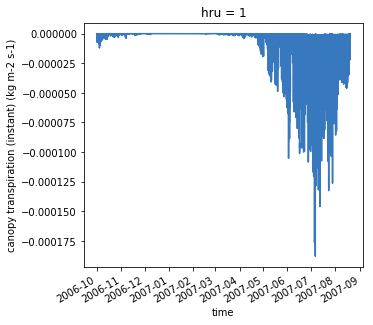

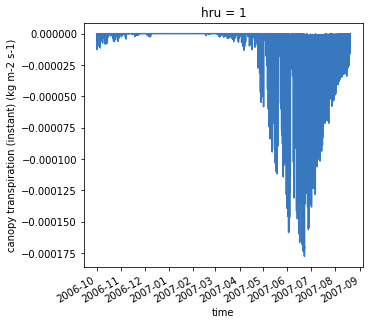

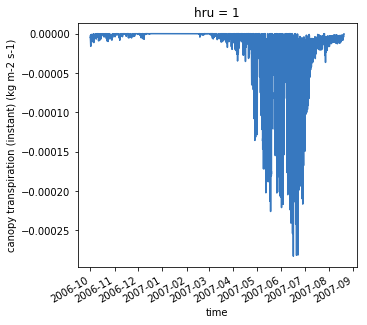

In [115]:
jtplot.figsize(x=5, y=5)
P1.plot_1d(29) 
P2.plot_1d(29) 
P3.plot_1d(29)

<span style="color:blue"> __- A-2 Display "scalarCanopyEvaporation" variable__

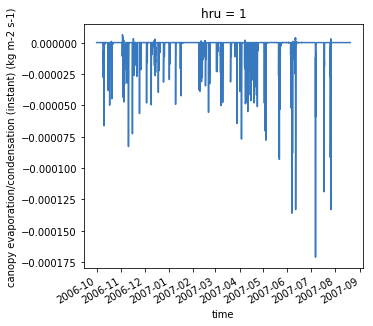

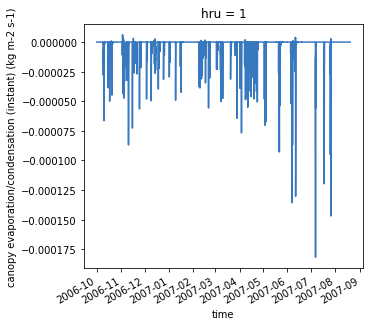

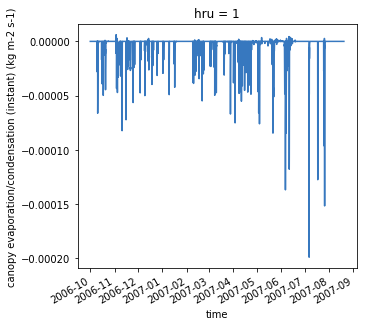

In [117]:
jtplot.figsize(x=5, y=5)
P1.plot_1d(30) 
P2.plot_1d(30) 
P3.plot_1d(30)

<span style="color:blue"> __- A-3 Display "scalarGroundEvaporation" variable__

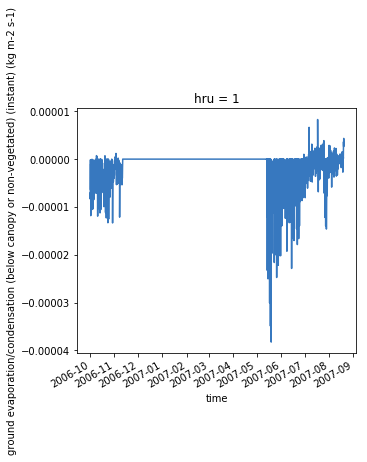

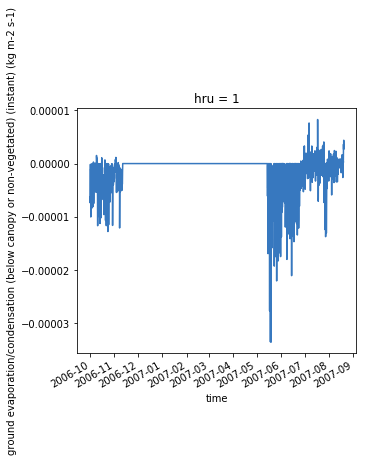

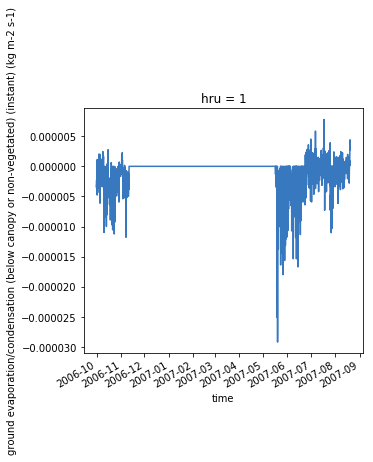

In [118]:
jtplot.figsize(x=5, y=5)
P1.plot_1d(31) 
P2.plot_1d(31) 
P3.plot_1d(31)

### (4-5) Display Observation "Evapotranspiration" Variables with time series

<span style="color:blue"> __- B-1 Get Validataion Data in ValidationdData folder__

In [153]:
Val_eddyFlux = Plotting('/home/hydro/Downloads/summaTestCases_2.x/testCases_data/validationData/ReynoldsCreek_eddyFlux.nc')

In [154]:
ValData_eddyFlux = Val_eddyFlux.open_netcdf()

<span style="color:blue"> __- B-2 Variable information of "ReynoldsCreek_eddyFlux.nc" in ValidationdData folder__

In [155]:
ValData_eddyFlux

<xarray.Dataset>
Dimensions:      (station: 3, time: 87696)
Coordinates:
  * station      (station) |S30 b'176b-AspenUnderstory' b'176d-Aspen' ...
  * time         (time) datetime64[ns] 2004-01-01 2004-01-01T00:30:00 ...
Data variables:
    date         (time) |S30 ...
    time_of_day  (time) |S30 ...
    rncnr        (time, station) float64 ...
    FC-wpl       (time, station) float64 ...
    LE-wpl       (time, station) float64 ...
    H-wpl        (time, station) float64 ...
    Scan         (time, station) float64 ...
    G            (time, station) float64 ...
    Rn-S-G       (time, station) float64 ...
    turbFlux     (time, station) float64 ...
    error        (time, station) float64 ...
    LECor        (time, station) float64 ...
    HCor         (time, station) float64 ...
    rsd          (time, station) float64 ...
    rsu          (time, station) float64 ...
    rld          (time, station) float64 ...
    rlu          (time, station) float64 ...
    wind         (time

<span style="color:blue"> __- B-3 Display Evapotranspiration variable (LE_wpl) at Aspen station__

AttributeError: 'DataArray' object has no attribute 'units'

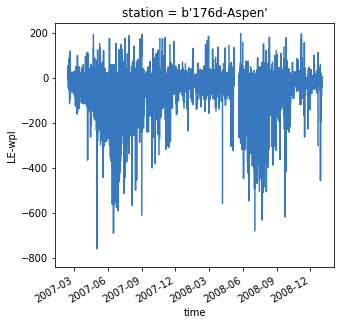

In [156]:
Val_eddyFlux.plot_1d_hru(1, 4)

----------------------------------------          End              -----------------------------------------

In [ ]:
a = P1_info.nSnow

In [84]:
a.attrs

OrderedDict([('long_name', 'number of snow layers (instant)'), ('units', '-')])

In [95]:
a.coords.indexes

time: DatetimeIndex([          '2006-10-01 00:00:00',
                     '2006-10-01 00:59:59.999986560',
                     '2006-10-01 02:00:00.000013440',
                               '2006-10-01 03:00:00',
                     '2006-10-01 03:59:59.999986560',
                     '2006-10-01 05:00:00.000013440',
                               '2006-10-01 06:00:00',
                     '2006-10-01 06:59:59.999986560',
                     '2006-10-01 08:00:00.000013440',
                               '2006-10-01 09:00:00',
                     ...
                               '2007-08-19 15:00:00',
                     '2007-08-19 15:59:59.999986624',
                     '2007-08-19 17:00:00.000013376',
                               '2007-08-19 18:00:00',
                     '2007-08-19 18:59:59.999986624',
                     '2007-08-19 20:00:00.000013376',
                               '2007-08-19 21:00:00',
                     '2007-08-19 21:59:59.999986624',
   

In [101]:
timeseries = a.data

In [106]:
timeseries[100]

array([0], dtype=int32)

In [72]:
P1_info.nSnow

<xarray.DataArray 'nSnow' (time: 7753, hru: 1)>
array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)
Coordinates:
  * time     (time) datetime64[ns] 2006-10-01 2006-10-01T00:59:59.999986560 ...
  * hru      (hru) int32 1
Attributes:
    long_name:  number of snow layers (instant)
    units:      -

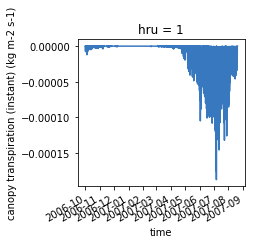

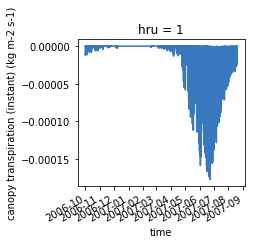

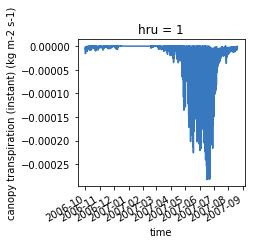

In [112]:
jtplot.figsize(x=3, y=3)
P1.plot_1d(29) 
P2.plot_1d(29) 
P3.plot_1d(29)

In [ ]:
P1.plot_1d(29), P1.plot_1d(30), P1.plot_1d(31)

### 5) Display 1D_hru (netCDF, hru, variable[scalarSWE]) with time series

*variable  = [ ['pptrate','0'], ['airtemp','1'], ['nSnow','10'], ['nSoil','11'],
                  ['nLayers','12'], ['midSoilStartIndex','13'], ['midTotoStartIndex','14'], 
                  ['ifcSoilStartIndex','15'], ['ifcTotoStartIndex','16'], ['scalarSWE','17'],
                  ['scalarSurfaceTemp','23'], ['scalarSenHeatTotal','27'],
                  ['scalarLatHeatTotal','28'], ['scalarSnowSublimation','29'],
                  ['scalarThroughfallSnow','30'], ['scalarThroughfallRain','31'],
                  ['scalarRainPlusMelt','32'], ['scalarInfiltration','33'],
                  ['scalarExfiltration','34'], ['scalarSurfaceRunoff','35'] ]*

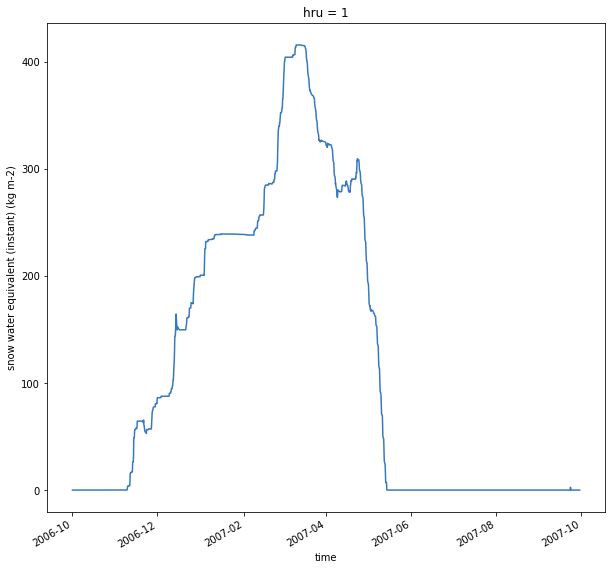

In [331]:
P.plot_1d_hru(0, 17)

### 6) Display 1D_layer (netCDF, hru, variable[iLayerHeight], layer time[midTotoStartIndex]) with time series

*variable = [ ['mLayerTemp','18'], ['mLayerVolFracIce','19'], ['mLayerVolFracLiq','20'], 
                  ['mLayerVolFracWat','21'],  ['mLayerMatricHead','22'], ['mLayerDepth','24'],  
                  ['mLayerHeight','25'],  ['iLayerHeight','26'], ['iLayerLiqFluxSoil','36'], 
                  ['mLayerLiqFluxSoil','37'] ]*
                  
*layer_time = [ ['midSoilStartIndex','13'], ['midTotoStartIndex','14'], 
              ['ifcSoilStartIndex','15'], ['ifcTotoStartIndex','16'] ]*    

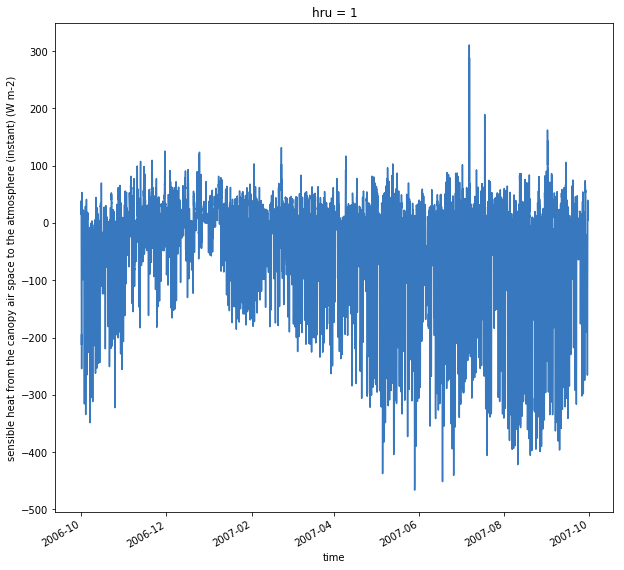

In [38]:
P.plot_1d_layer(0, 26, 14, 2703)